<a href="https://colab.research.google.com/github/rahulsid55/LinearRegression/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read data
url='https://raw.githubusercontent.com/dhyan6/data-science-projects/main/kc_house_data.csv'
houses=pd.read_csv(url)

In [4]:
print(houses.head())

      price  bedrooms  bathrooms  ...  sqft_above  sqft_basement  zipcode
0  221900.0         3       1.00  ...        1180              0    98178
1  538000.0         3       2.25  ...        2170            400    98125
2  180000.0         2       1.00  ...         770              0    98028
3  604000.0         4       3.00  ...        1050            910    98136
4  510000.0         3       2.00  ...        1680              0    98074

[5 rows x 11 columns]


In [5]:
#to get info about data
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  zipcode        21613 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.8 MB
None


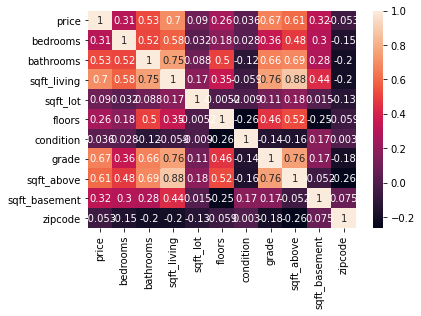

In [6]:
correlations = houses.corr()
sns.heatmap(correlations, annot=True)

In [8]:
from sklearn.model_selection import train_test_split

In [17]:
X=houses[['sqft_living']]
Y=houses['price']
print(len(Y))

21613


In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)

5404


In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(lr.coef_)
print(lr.intercept_)

[285.28689718]
-52292.07876013778


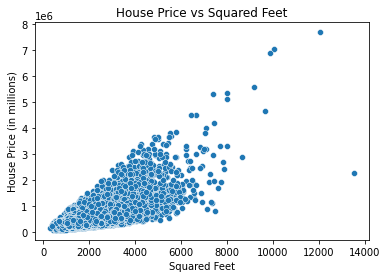

In [27]:
plt.title("House Price vs Squared Feet")
plt.xlabel("Squared Feet")
plt.ylabel("House Price (in millions)")
sns.scatterplot(x='sqft_living', y='price', data=houses)

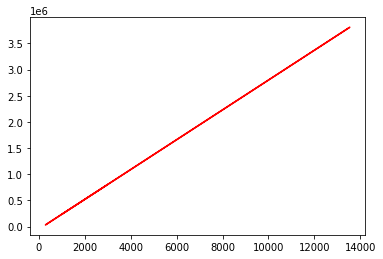

In [28]:
plt.plot(x_train, lr.coef_*x_train + lr.intercept_, '-r', label='Intercept: -39,163 \nSlope: 279.4')

In [31]:
lr.predict([[1180]])

array([284346.45990832])

In [32]:
# Define a set of predictions for y based on subset x_test
y_pred = lr.predict(x_test)
# Import module
from sklearn.metrics import mean_squared_error
# We pass the test values and the predicted values
mse = mean_squared_error(y_test, y_pred)
# Let's take the square root
rmse = np.sqrt(mse)
# Print the result
print('Root Mean Squared Error: ' + str(rmse))

Root Mean Squared Error: 254328.76179043038
